In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('spectra_energy_mu.csv')
df

,Energies (eV),Cu1.5Te-629332-full/Cu1.0
0,8970.00,0.03
1,8970.81,0.03
2,8971.62,0.03
3,8972.42,0.04
4,8973.23,0.04
...,...,...
95,9046.77,1.00
96,9047.58,1.01
97,9048.38,1.01
98,9049.19,1.02


In [20]:
df_pre= df[(df['Energies (eV)'] >= 8995) & (df['Energies (eV)'] <= 9010)]

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
import numpy as np
def func(x, a, b, c):
     return a * np.exp(-b * x) + c

In [23]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, df_pre["Energies (eV)"], df_pre["Cu1.5Te-629332-full/Cu1.0"])
popt

/opt/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([1.        , 1.        , 0.95526316])

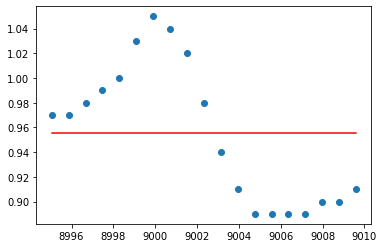

In [24]:
plt.plot(df_pre["Energies (eV)"], func(df_pre["Energies (eV)"], *popt), 'r-')
plt.scatter(df_pre["Energies (eV)"], df_pre["Cu1.5Te-629332-full/Cu1.0"])

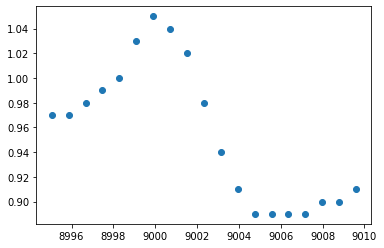

In [25]:
plt.scatter(df_pre["Energies (eV)"], df_pre["Cu1.5Te-629332-full/Cu1.0"])

In [26]:
def func2(x, a, b,c):
    return a*np.sqrt(x)*(b*np.square(x)+c)

In [27]:
popt, pcov = curve_fit(func2, df_pre["Energies (eV)"], df_pre["Cu1.5Te-629332-full/Cu1.0"])
popt

array([-2.00542748e-06,  2.67069021e-03, -2.21458136e+05])

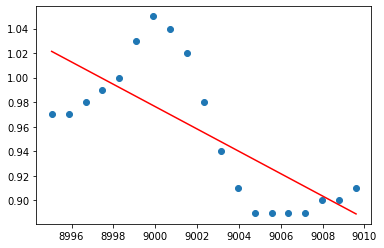

In [28]:
plt.plot(df_pre["Energies (eV)"], func2(df_pre["Energies (eV)"], *popt), 'r-')
plt.scatter(df_pre["Energies (eV)"], df_pre["Cu1.5Te-629332-full/Cu1.0"])

In [29]:
import math
def func3(x, a,u, sig):
    return  a*(np.exp(-(x - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig))*(431+(4750/x))

In [30]:
popt, pcov = curve_fit(func3, df_pre["Energies (eV)"], df_pre["Cu1.5Te-629332-full/Cu1.0"])
popt

/opt/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([1., 1., 1.])

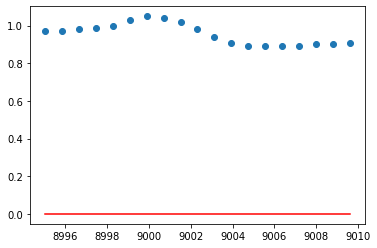

In [31]:
plt.plot(df_pre["Energies (eV)"], func3(df_pre["Energies (eV)"], *popt), 'r-')
plt.scatter(df_pre["Energies (eV)"], df_pre["Cu1.5Te-629332-full/Cu1.0"])

In [32]:
import sklearn.gaussian_process as gp

In [33]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def kfold_CV(df_pre):
    '''
    this function wil show a graph for Mean Squared Error and Degree of Polynomial using k -fold
    X_columns_all should be a dataframe 
    '''
    X_columns_all=df_pre["Energies (eV)"]
    y = df_pre["Cu1.5Te-629332-full/Cu1.0"]
    kf = KFold(n_splits=10, shuffle=True)# Define the split - into 10 folds 
    kf.get_n_splits(X_columns_all, y)# returns the number of splitting iterations in the cross-validaton

    kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
    model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    #creat train and test vars 
    #print("TRAIN:", train_index, "TEST:", test_index)
        #print("x-train[X_train.columns[0:2]]: ", X_train[X_train.columns[0:2].values])
        #print (X_train.shape, y_train.shape)
        #print (X_test.shape, y_test.shape)
        
    fig, axs = plt.subplots(10, 1, figsize=(5,50))

    i=0
    for train_index, test_index in kf.split(X_columns_all, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_columns_all.iloc[train_index], X_columns_all.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train,y_train)
        params = model.kernel_.get_params()
        print("params  = " + params)
        print('Set '+str(i+1))
        print('R-squared of training data is: '+"{:.3f}".format(r2_score(y_train,model.predict(X_train)))+', '+"{:.3f}".format(model.score(X_train,y_train)))
        print('R-squared of testing data is: '+"{:.3f}".format(r2_score(y_test,model.predict(X_test)))+', '+"{:.3f}".format(model.score(X_test,y_test)))
        axs[i].scatter(X_train, y_train, color='blue')
        axs[i].scatter(X_test, model.predict(X_test), color='red')
        axs[i].scatter(X_test, y_test, color='green')                                                              
        axs[i].set_title('Set '+str(i+1), fontsize=12)
        axs[i].set_xlabel('energy')
        axs[i].set_ylabel('mu')
        axs[i].legend(('Training data', 'fitting curve', 'Testing data'))
        i=i+1

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 15 16 17 18] TEST: [10 14]


KeyError: "None of [Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18], dtype='int64')] are in the [index]"

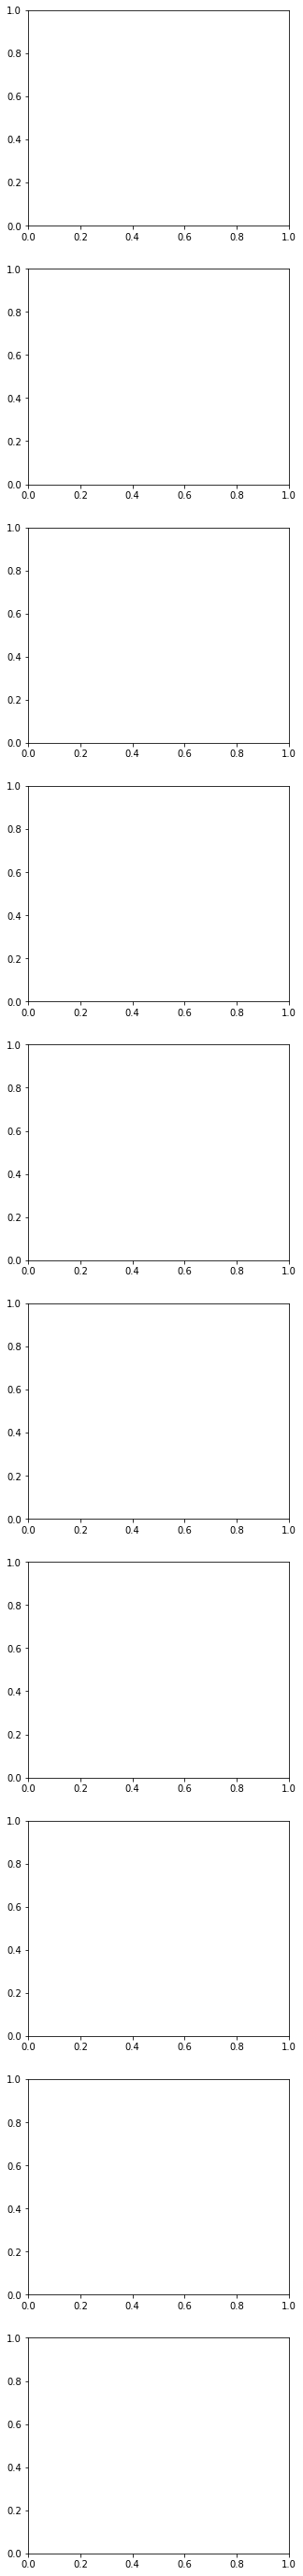

In [34]:
kfold_CV(df_pre)

In [35]:
from sklearn.model_selection import train_test_split
x=df_pre["Energies (eV)"]
y = df_pre["Cu1.5Te-629332-full/Cu1.0"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,test_size=0.4,random_state=123)
x_train.values.reshape(-1,1)
y_train.values

array([0.89, 0.89, 0.98, 0.91, 0.94, 0.99, 0.97, 1.05, 0.9 , 0.98, 0.89])

In [36]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

In [37]:
model.fit(x_train.values.reshape(-1,1), y_train)

GaussianProcessRegressor(alpha=0.1, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)

0.003997209376243993


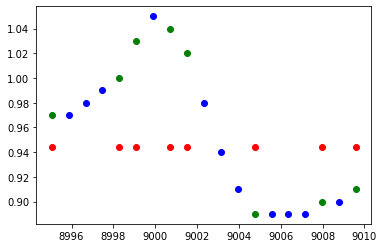

In [38]:
params = model.kernel_.get_params()
y_pred, std = model.predict(x_test.values.reshape(-1,1), return_std=True)
MSE = ((y_pred-y_test)**2).mean()
print(MSE)
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, model.predict(x_test.values.reshape(-1,1)), color='red')
plt.scatter(x_test, y_test, color='green')

try to fit the whole spectrum 

In [39]:
df = pd.read_csv('spectra_energy_mu.csv')

score:
0.95126218031253
params is :
{'k1': 0.369**2, 'k2': RBF(length_scale=14.4), 'k1__constant_value': 0.13626525708804174, 'k1__constant_value_bounds': (0.1, 1000.0), 'k2__length_scale': 14.370188009587617, 'k2__length_scale_bounds': (0.001, 1000.0)}
0.004606545996067848


Text(0, 0.5, 'Actual')

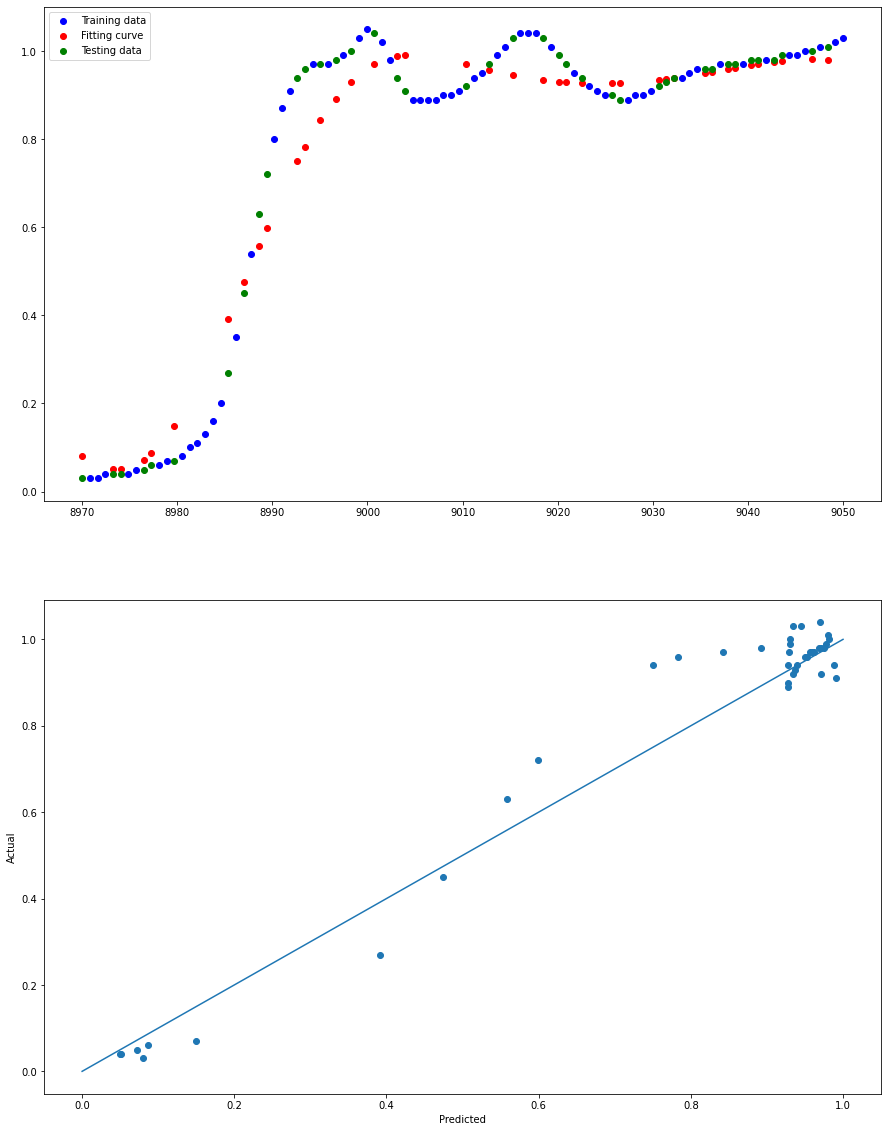

In [40]:
from sklearn.model_selection import train_test_split
x=df["Energies (eV)"]
y = df["Cu1.5Te-629332-full/Cu1.0"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,test_size=0.4,random_state=123)
#x_train.values.reshape(-1,1)
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
gpr = model.fit(x_train.values.reshape(-1,1), y_train)
print("score:")
print(gpr.score(x_train.values.reshape(-1,1), y_train))
params = model.kernel_.get_params()
print("params is :")
print(params)
y_pred, std = model.predict(x_test.values.reshape(-1,1), return_std=True)
MSE = ((y_pred-y_test)**2).mean()
print(MSE)
fig, axs = plt.subplots(2,1,figsize=(15,20))
axs[0].scatter(x_train, y_train, color='blue', label = "training data")
axs[0].scatter(x_test, model.predict(x_test.values.reshape(-1,1)), color='red',label = "fitting curve")
axs[0].scatter(x_test, y_test, color='green', label = "testing data")
axs[0].legend(('Training data', "Fitting curve", 'Testing data'))
axs[1].scatter(model.predict(x_test.values.reshape(-1,1)), y_test)
axs[1].plot(np.linspace(0,1), np.linspace(0,1))
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')